# Tutorial 5 - Introduction to Interpolation with Julia

Last tutorial, we introduced basic scientific computation problems with Julia, namely, problems involving Taylor Series approximations and linear systems. In this lecture, we will cover examples of interpolation using Julia.

## Exercise 1 - Monomial Interpolation

Use the Monomial interpolation process to obtain a polynomial of least degree that assumes these values:

| x | 0 | 2  | 3  |
|---|---|----|----|
| y | 8 | 11 | 28 |

Recall that since there are $n = 3$ points, the interpolating polynomial is degree $n - 1 = 3 - 1 = 2$. Also recall the 3x3 Vandermonde coefficient matrix:

$$X = \begin{bmatrix}
   1 & x_0 & x_0^2 \\
   1 & x_1 & x_1^2 \\
   1 & x_2 & x_2^2
\end{bmatrix}$$

We need to solve the following system for $c_0, c_1, c_2$:

$$Xc = \begin{bmatrix}
   1 & x_0 & x_0^2 \\
   1 & x_1 & x_1^2 \\
   1 & x_2 & x_2^2
\end{bmatrix} \begin{bmatrix}
   c_0 \\
   c_1 \\
   c_2
\end{bmatrix} =\begin{bmatrix}
   y_0 \\
   y_1 \\
   y_2
\end{bmatrix} $$

First, we must input the values from our table:

$$Xc = \begin{bmatrix}
   1 & 0 & 0^2 \\
   1 & 2 & 2^2 \\
   1 & 3 & 3^2
\end{bmatrix} \begin{bmatrix}
   c_0 \\
   c_1 \\
   c_2
\end{bmatrix} =\begin{bmatrix}
   8 \\
   11 \\
   28
\end{bmatrix} $$

$$Xc = \begin{bmatrix}
   1 & 0 & 0 \\
   1 & 2 & 4 \\
   1 & 3 & 9
\end{bmatrix} \begin{bmatrix}
   c_0 \\
   c_1 \\
   c_2
\end{bmatrix} =\begin{bmatrix}
   8 \\
   11 \\
   28
\end{bmatrix} $$

We can solve this system manually (as expected in an exam) or using Julia:

In [1]:
using LinearAlgebra

x_data = [0; 2; 3]
y_data = [8; 11; 28]

vand = [ones(size(x_data,1)) x_data x_data.^2 ] # create Vandermonde matrix
display(vand)
c = vand\y_data

3×3 Matrix{Float64}:
 1.0  0.0  0.0
 1.0  2.0  4.0
 1.0  3.0  9.0

3-element Vector{Float64}:
  8.0
 -8.833333333333334
  5.166666666666667

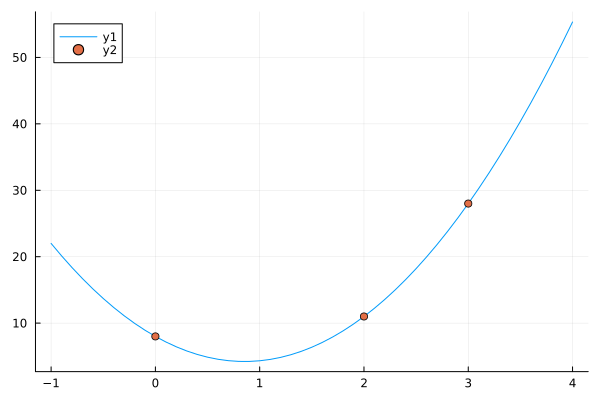

In [2]:
using Plots

x = -1:0.1:4
p = (x) -> @. c[1] + c[2]*x + c[3]*x^2
plot(x,p(x))
scatter!(x_data, y_data)

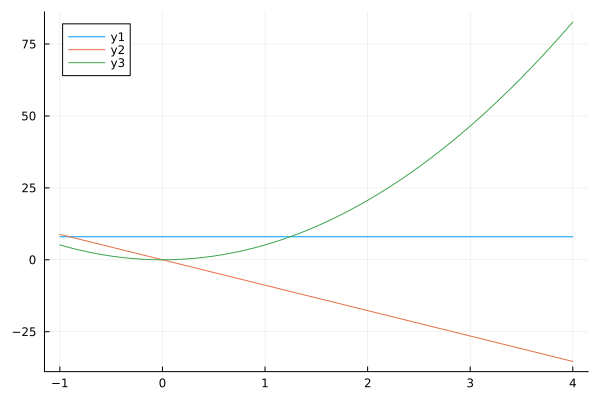

In [3]:
plot(x,c[1].*ones(size(x)))
plot!(x,c[2].*x)
plot!(x, @. c[3]*x^2)

In [4]:
# check that p_3(0) = 8
p(0)

8.0

Ultimately, we have the interpolating polynomial $p(x) = 5.16x^2 - 8.83x + 8$

## Exercise 2 - Lagrange Interpolation

Use the Lagrange interpolation process to obtain a polynomial of least degree that assumes these values:

| x | 0 | 2  | 3  | 4  |
|---|---|----|----|----|
| y | 7 | 11 | 28 | 63 |

To solve this problem, find the cardinal polynomials and plug into the interpolation formula. Since we have 4 points, $n = 4 - 1 = 3$. 

Recall:

$$p_n(x) = \sum_{j=0}^n y_j L_j(x_i) $$

$$L_j(x_i) = \prod_{i = 0, i \neq j}^n \frac{x - x_i}{x_j - x_i} $$

First, we can compute our $L_j$ values:

$$L_0(x) = \frac{(x - 2)(x - 3)(x - 4)}{(0 - 2)(0 - 3)(0 - 4)} = \frac{-1}{24}(x - 2)(x - 3)(x - 4)$$

$$L_1(x) = \frac{(x - 0)(x - 3)(x - 4)}{(2 - 0)(2 - 3)(2 - 4)} = \frac{1}{4}(x)(x - 3)(x - 4)$$

$$L_2(x) = \frac{(x - 0)(x - 2)(x - 4)}{(3 - 0)(3 - 2)(3 - 4)} = \frac{-1}{3}(x)(x - 2)(x - 4)$$

$$L_3(x) = \frac{(x - 0)(x - 2)(x - 3)}{(4 - 0)(4 - 2)(4 - 3)} = \frac{1}{8}(x)(x - 2)(x - 3)$$

Now that we have our Lagrange basis $\{L_0(x),...,L_3(x)\}$, we can use it to compute $p_n$ by multiplying each polynomial by its corresponding $y_j$, then adding everything:

$$p_3(x) = (7)\frac{-1}{24}(x - 2)(x - 3)(x - 4) + (11)\frac{1}{4}(x)(x - 3)(x - 4) + (28)\frac{-1}{3}(x)(x - 2)(x - 4) + (63)\frac{1}{8}(x)(x - 2)(x - 3)$$

$$p_3(x) = \frac{-7}{24}(x - 2)(x - 3)(x - 4) + \frac{11}{4}(x)(x - 3)(x - 4) + \frac{-28}{3}(x)(x - 2)(x - 4) + \frac{63}{8}(x)(x - 2)(x - 3)$$

$$p_3(x) = x^3 - 2x + 7$$

We can plot this polynomial in Julia as follows:

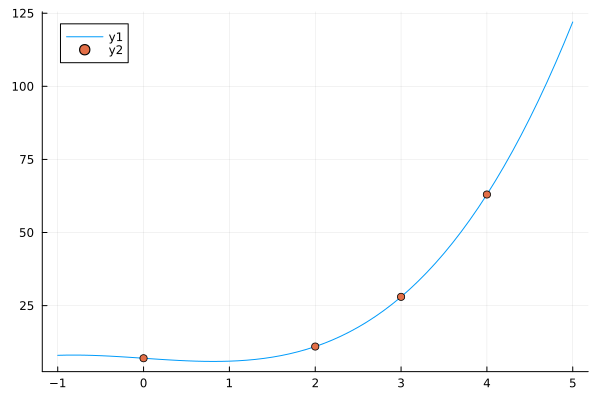

In [5]:
using Plots

l0 = (x) -> @. (x-2)*(x-3)*(x-4)/-24
l1 = (x) -> @. (x-0)*(x-3)*(x-4)/4
l2 = (x) -> @. (x-0)*(x-2)*(x-4)/-3
l3 = (x) -> @. (x-0)*(x-2)*(x-3)/8

p = (x) -> @. 7*l0(x) + 11*l1(x) + 28*l2(x) + 63*l3(x)

x = -1:0.1:5
plot(x,p(x))
scatter!([0,2,3,4],[7,11,28,63])


Notice that the points refer to the given x and y values. The interpolating polynomial must pass through all points. If there are n points, the interpolating polynomial is degree n - 1, starting with the trivial case of the constant function passing through one point, to the linear function, and to higher degree polynomials such as quintics.

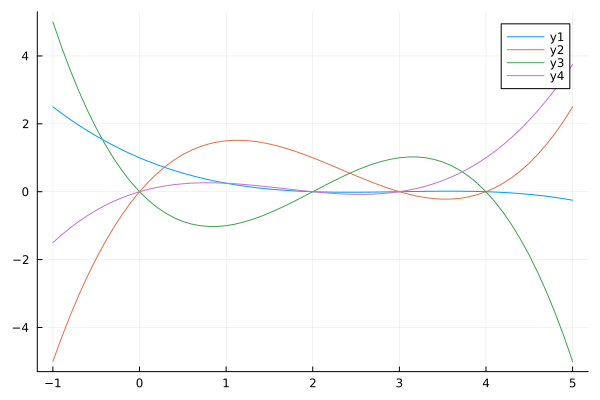

In [6]:
plot(x,l0(x))
plot!(x, l1(x))
plot!(x, l2(x))
plot!(x, l3(x))

It is also a good idea to evaluate the interpolating polynomial at the given $x_j$ s and see if the evaluation equals the $y_j$ s. If this does not happen, the interpolating polynomial is incorrect.

In [7]:
# check that p_3(0) = 7
p(0)

7.0

## Exercise 3 - Newton Interpolation

Use a divided-difference table to show that the following data can be represented by a polynomial of degree 3:

| x  | y  |
|----|----|
| -2 | 1  |
| -1 | 4  |
| 0  | 11 |
| 1  | 16 |
| 2  | 13 |
| 3  | -4 |

What is the Newton interpolating polynomial?

We need to compute up to the fourth differences to check this result. The idea here is that the last n-difference with non-zero entries will be the degree of the interpolating polynomial.

Recall:

To calculate the first difference, we can use a simple rise-over-run formula:

$$[y_0, y_1] = \frac{y_1 - y_0}{x_1 - x_0} = c_1$$

$$[y_1, y_2] = \frac{y_2 - y_1}{x_2 - x_1}$$

The second difference is the difference between the first differences:

$$[y_0, y_1, y_2] = \frac{[y_1, y_2] - [y_0, y_1]}{x_2 - x_0} = c_2$$

We can compute the results and output them in a table:

$
\def\arraystretch{1.5}
   \begin{array}{c:c:c:c:c}
   x & y_i = [y_i]  & [y_{i-1}, y_i] & [y_{i-2}, y_{i-1}, y_i] & [y_{i-3}, y_{i-2}, y_{i-1}, y_i] \\ \hline
   -2 & \bf{1} & - & - & - \\
   -1 & 4 & \bf{3} & - & - \\
   0 & 11 & 7 & \bf{2} & - \\
   1 & 16 & 5 & -1 & \bf{-1} \\
   2 & 13 & -3 & -4 & -1 \\
   3 & -4 & -17 & -7 & -1
\end{array}
$

Our third differences are all the same value. From this, we can conclude that the numerators in our fourth differences will be zero and that the fourth differences will all be zero. Therefore, our interpolation will be degree $n = 3$.

Also, note that the bolded differences on the diagonal are our coefficients $c_0$ through $c_3$.

Recall Newton Basis Functions and Newton Form:

$$\phi_j(x) = \prod_{i=0}^{j - 1} (x - x_i) = (x - x_0)(x - x_1)...(x - x_{j - 1}), j = 0,...,n$$

$$p_n(x) = \sum_{j = 0}^n c_j \phi_j(x) = \sum_{i = 0}^n c_j \prod_{i=0}^{j - 1} (x - x_i)$$

We can use our divided differences table to compute $p_3(x)$:

$p_3(x) = 1 + 3(x - (-2)) + 2(x - (-2))(x - (-1)) - 1(x - (-2))(x - (-1))(x - 0)$

$p_3(x) = -x^3 - x^2 + 7x + 11$

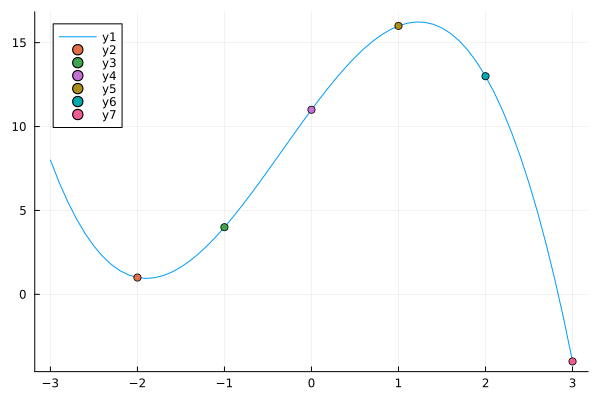

In [8]:
using Plots

x0 = [-2 -1 0 1 2 3];
y0 = [1 4 11 16 13 -4];

p0 = 1;
p1 = (x) -> @. 3*(x+2);
p2 = (x) -> @. 2*(x+2)*(x+1);
p3 = (x) -> @. -1*(x+2)*(x+1)*x;

P = (x) -> @. p0 + p1(x) + p2(x) + p3(x)

x = -3:0.1:3
plot(x,P(x))
scatter!(x0, y0)


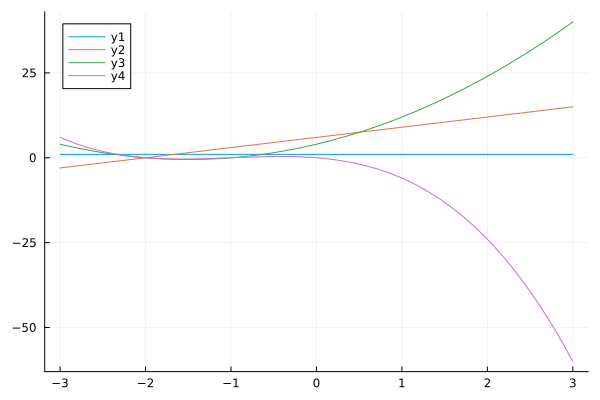

In [9]:
plot(x, ones(size(x)))
plot!(x, p1(x))
plot!(x, p2(x))
plot!(x, p3(x))

## Exercise 4 - Newton Interpolation Cont.

Given the data:


| x    | sin(x)       | cos(x)       |
|------|--------------|--------------|
| 0.70 | 0.6442176872 | 0.7648421873 |
| 0.71 | 0.6518337710 | 0.7583618760 |

... find approximate values of $\sin 0.705$ and $\cos 0.702$ by linear interpolation. What is the error?

It is best to compute this using Julia:

First, we approximate $\sin 0.705$:

In [10]:
x0 = 0.70;
x1 = 0.71;

y0 = 0.6442176872;
y1 = 0.6518337710;

x = 0.705;
p = y0 +(y1 - y0) / (x1 - x0) * (x - x0);
error = sin(0.705) - p;

println(string("sin(0.705) = ", p))
println(string("error = ",error))

sin(0.705) = 0.6480257291
error = 8.10043560717233e-6


In [11]:
x0 = 0.70;
x1 = 0.71;

y0 = 0.7648421873;
y1 = 0.7583618760;

x = 0.702;
p = y0 +(y1 - y0) / (x1 - x0) * (x - x0);
error = cos(0.702)-p;

println(string("cos(0.702) = ", p))
println(string("error = ",error))

cos(0.702) = 0.76354612504
error = 6.098045105207284e-6
